In [1]:
import prepare as p
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import itertools



Fit the random forests classifier to your training sample and transform (i.e. make predictions on the training sample)

Use the titanic data

In [2]:
titanic = p.prep_titanic()
print(titanic.shape)
print(titanic['survived'].mean())
titanic.head(3)

(891, 15)
0.3838383838383838


,passenger_id,survived,sex,age,sibsp,parch,fare,class,embark_town,alone,embark_town_queenstown,embark_town_southampton,class_second,class_third,sex_male
0,0,0,male,22.0,1,0,7.2500,Third,Southampton,0,0,1,0,1,1
1,1,1,female,38.0,1,0,71.2833,First,Cherbourg,0,0,0,0,0,0
2,2,1,female,26.0,0,0,7.9250,Third,Southampton,1,0,1,0,1,0


Split data 70/20/10

In [3]:
train, validate, test = p.split_data(df=titanic, test_size=.1, validate_size=.2, 
                                     stratify_col='survived', random_state=25)
print(len(train), len(validate), len(test))
print(train['survived'].mean(), validate['survived'].mean(), test['survived'].mean())

623 178 90
0.38362760834670945 0.38202247191011235 0.3888888888888889


split X features and y target

In [4]:
def x_y_split(data_set, target, features):
    X = data_set[features]
    y = data_set[target]
    return X, y

Get desired columns

In [5]:
titanic.columns

Index(['passenger_id', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'class', 'embark_town', 'alone', 'embark_town_queenstown',
       'embark_town_southampton', 'class_second', 'class_third', 'sex_male'],
      dtype='object')

In [6]:
features = ['sibsp', 'parch', 'fare', 'alone', 'embark_town_queenstown', 
            'embark_town_southampton', 'class_second', 'class_third', 'sex_male']

X_train, y_train = x_y_split(data_set=train, target='survived', features=features)

X_validate, y_validate = x_y_split(data_set=validate, target='survived', features=features)

X_test, y_test = x_y_split(data_set=test, target='survived', features=features)

# verify
print(len(X_train),len(X_validate),len(X_test))

623 178 90


run baseline model

In [7]:
def run_baseline_model(train, validate, target):

    # create baseline model
    baseline_pred = y_train.mode()
    y_train_pred = pd.Series((baseline_pred[0]), range(len(y_train)))
    y_val_pred = pd.Series((baseline_pred[0]), range(len(y_validate)))

    scores = []

    output = {
    'features': features,
    'model': 'baseline',
    'train_accuracy': metrics.accuracy_score(y_train, y_train_pred),
    'train_precision': metrics.precision_score(y_train, y_train_pred),
    'train_recall/TPR': metrics.recall_score(y_train, y_train_pred),
    'train_f1': metrics.f1_score(y_train, y_train_pred),
    'validate_accuracy':  metrics.accuracy_score(y_validate, y_val_pred),
    'validate_precision': metrics.precision_score(y_validate, y_val_pred),
    'validate_recall/TPR': metrics.recall_score(y_validate, y_val_pred),
    'validate_f1': metrics.f1_score(y_validate, y_val_pred),
    }
    scores.append(output)
    
    scores_df = pd.DataFrame(scores)
    
    return scores_df

In [8]:
display(run_baseline_model(train, validate, 'survived'))

/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,features,model,train_accuracy,train_precision,train_recall/TPR,train_f1,validate_accuracy,validate_precision,validate_recall/TPR,validate_f1
0,"[sibsp, parch, fare, alone, embark_town_queens...",baseline,0.616372,0.0,0.0,0.0,0.617978,0.0,0.0,0.0


**1.**
- **What is your baseline prediction?** 0, did not survive
- **What is your baseline accuracy?** 61.2%

**2.**

- **Fit the decision tree classifier to your training sample and transform (make predictions)**

Make model

In [11]:
clf = RandomForestClassifier(bootstrap=True, 
                                 class_weight=None, 
                                 criterion='gini',
                                 min_samples_leaf=3,
                                 n_estimators=100,
                                 max_depth=3, 
                                 random_state=123)

Fit model

In [12]:
clf = clf.fit(X_train, y_train)

make predicctions

In [13]:
y_pred_train = clf.predict(X_train)
y_pred_val = clf.predict(X_validate)

2. Evaluate your results using the model score, confusion matrix, and classification report.

In [14]:
print(f'Model score on training set: {clf.score(X_train, y_train)}')
print(f'Confusion Matrix on training set:\n {metrics.confusion_matrix(y_train, y_pred_train)}')
print(f'Classification Report on training set:\n {metrics.classification_report(y_train, y_pred_train)}')

Model score on training set: 0.8234349919743178
Confusion Matrix on training set:
 [[369  15]
 [ 95 144]]
Classification Report on training set:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87       384
           1       0.91      0.60      0.72       239

    accuracy                           0.82       623
   macro avg       0.85      0.78      0.80       623
weighted avg       0.84      0.82      0.81       623



In [15]:
print(f'Model score on validation set: {clf.score(X_validate, y_validate)}')
print(f'Confusion Matrix on validation set:\n {metrics.confusion_matrix(y_validate, y_pred_val)}')
print(f'Classification Report on validation set:\n {metrics.classification_report(y_validate, y_pred_val)}')

Model score on validation set: 0.7696629213483146
Confusion Matrix on validation set:
 [[101   9]
 [ 32  36]]
Classification Report on validation set:
               precision    recall  f1-score   support

           0       0.76      0.92      0.83       110
           1       0.80      0.53      0.64        68

    accuracy                           0.77       178
   macro avg       0.78      0.72      0.73       178
weighted avg       0.77      0.77      0.76       178



Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Run through steps 2-4 using a different `max_depth` value.



In [16]:
scores = []

for m in range(2,len(features)+20):
    # Make KNN classifier 
    clf = RandomForestClassifier(bootstrap=True, 
                                 class_weight=None, 
                                 criterion='gini',
                                 min_samples_leaf=3,
                                 n_estimators=100,
                                 max_depth=m, 
                                 random_state=123)

    # Fit KNN classifier
    clf.fit(X_train, y_train)
    
    # Predict
    y_pred_train = clf.predict(X_train)
    y_pred_val = clf.predict(X_validate)
    
    output = {
        'model': f'DT: max_depth={m}',
        'train_accuracy': metrics.accuracy_score(y_train, y_pred_train),
        'train_precision': metrics.precision_score(y_train, y_pred_train),
        'train_recall/TPR': metrics.recall_score(y_train, y_pred_train),
        'train_f1': metrics.f1_score(y_train, y_pred_train),
        'validate_accuracy':  metrics.accuracy_score(y_validate, y_pred_val),
        'validate_precision': metrics.precision_score(y_validate, y_pred_val),
        'validate_recall/TPR': metrics.recall_score(y_validate, y_pred_val),
        'validate_f1': metrics.f1_score(y_validate, y_pred_val),
    }

    scores.append(output)
    

pd.DataFrame(scores)

,model,train_accuracy,train_precision,train_recall/TPR,train_f1,validate_accuracy,validate_precision,validate_recall/TPR,validate_f1
0,DT: max_depth=2,0.799358,0.847561,0.581590,0.689826,0.758427,0.804878,0.485294,0.605505
1,DT: max_depth=3,0.823435,0.905660,0.602510,0.723618,0.769663,0.800000,0.529412,0.637168
2,DT: max_depth=4,0.829856,0.903030,0.623431,0.737624,0.758427,0.765957,0.529412,0.626087
3,DT: max_depth=5,0.837881,0.905882,0.644351,0.753056,0.769663,0.775510,0.558824,0.649573
4,DT: max_depth=6,0.847512,0.923529,0.656904,0.767726,0.780899,0.795918,0.573529,0.666667
5,DT: max_depth=7,0.855538,0.916201,0.686192,0.784689,0.769663,0.764706,0.573529,0.655462
6,DT: max_depth=8,0.866774,0.919355,0.715481,0.804706,0.780899,0.784314,0.588235,0.672269
7,DT: max_depth=9,0.865169,0.918919,0.711297,0.801887,0.780899,0.784314,0.588235,0.672269
8,DT: max_depth=10,0.866774,0.914894,0.719665,0.805621,0.769663,0.754717,0.588235,0.661157
9,DT: max_depth=11,0.868379,0.910995,0.728033,0.809302,0.769663,0.745455,0.602941,0.666667


Which model performs better on your in-sample data?

Which model performs best on your out-of-sample data, the validate set?

In [20]:
strong_model_columns = ['class_second', 'class_third','sex_male','fare','alone','embark_town_southampton']
all_model_columns = ['fare', 'alone', 'embark_town_queenstown', 'embark_town_southampton',
                     'class_second', 'class_third', 'sex_male']

In [26]:
# get column combinations
column_combinations = []
for k in range(1, len(strong_model_columns)+1):
    for combo in list(itertools.combinations(strong_model_columns, k)):
        column_combinations.append(list(combo))
        
column_combinations

[['class_second'],
 ['class_third'],
 ['sex_male'],
 ['fare'],
 ['alone'],
 ['embark_town_southampton'],
 ['class_second', 'class_third'],
 ['class_second', 'sex_male'],
 ['class_second', 'fare'],
 ['class_second', 'alone'],
 ['class_second', 'embark_town_southampton'],
 ['class_third', 'sex_male'],
 ['class_third', 'fare'],
 ['class_third', 'alone'],
 ['class_third', 'embark_town_southampton'],
 ['sex_male', 'fare'],
 ['sex_male', 'alone'],
 ['sex_male', 'embark_town_southampton'],
 ['fare', 'alone'],
 ['fare', 'embark_town_southampton'],
 ['alone', 'embark_town_southampton'],
 ['class_second', 'class_third', 'sex_male'],
 ['class_second', 'class_third', 'fare'],
 ['class_second', 'class_third', 'alone'],
 ['class_second', 'class_third', 'embark_town_southampton'],
 ['class_second', 'sex_male', 'fare'],
 ['class_second', 'sex_male', 'alone'],
 ['class_second', 'sex_male', 'embark_town_southampton'],
 ['class_second', 'fare', 'alone'],
 ['class_second', 'fare', 'embark_town_southampton

In [28]:
def get_feature_combos(features):
    '''
    Returns a list of all possible feature combinations
    '''
    # get column combinations
    feature_combinations = []
    for k in range(1, len(features)+1):
        for combo in list(itertools.combinations(features, k)):
            feature_combinations.append(list(combo))
    return feature_combinations

In [48]:
print(int(len(X_train)/30))
list(range(3, int(len(X_train)/30), 4))

20


[3, 7, 11, 15, 19]

In [59]:
def run_rf_model(train, validate, target, features, random_state=None):   
    '''
    takes in train set, validate set, target, columns to model
    gets all column combinations and runs decision tree models for each combination
    scores for each model are stored in a DataFrame, scores_df
    
    Returns scores_df, a DataFrame of model scores
    '''
    
    # get columns combination
    feature_combos = get_feature_combos(features)
    
    # for each combo of features
    for i, features in enumerate(feature_combos):
        
        # split X and y
        X_train, y_train = x_y_split(data_set=train, target=target, features=features)

        X_validate, y_validate = x_y_split(data_set=validate, target=target, features=features)
        
        scores = []
        
        # hyperparameter tuning
        for m_d in range(3, int(len(X_train)/30), 4):
            for c_w in [None, 'balanced']:
                for m_s_l in [1, 5, 10, 20]:
                    # Make RF classifier 
                    clf = RandomForestClassifier(bootstrap=True, 
                                         class_weight=c_w, 
                                         criterion='gini',
                                         min_samples_leaf=m_s_l,
                                         n_estimators=100,
                                         max_depth=m_d, 
                                         random_state=123)

                    # Fit RF classifier
                    clf.fit(X_train, y_train)

                    # Predict
                    y_pred_train = clf.predict(X_train)
                    y_pred_val = clf.predict(X_validate)

                    output = {
                        'features': features,
                        'model': 'RF',
                        'hyperparameters': f'max_depth={m_d}\nclass_weight={c_w}\nmin_samples_leaf={m_s_l}',
                        'train_accuracy': metrics.accuracy_score(y_train, y_pred_train),
                        'train_precision': metrics.precision_score(y_train, y_pred_train),
                        'train_recall/TPR': metrics.recall_score(y_train, y_pred_train),
                        'train_f1': metrics.f1_score(y_train, y_pred_train),
                        'validate_accuracy':  metrics.accuracy_score(y_validate, y_pred_val),
                        'validate_precision': metrics.precision_score(y_validate, y_pred_val),
                        'validate_recall/TPR': metrics.recall_score(y_validate, y_pred_val),
                        'validate_f1': metrics.f1_score(y_validate, y_pred_val),
                    }
                    scores.append(output)
            
        # initialize scores DataFrame for first iteration
        if i == 0:
            scores_df = pd.DataFrame(scores)
        # concat scores DataFrames for the rest of the iterations
        else:
            scores_df = pd.concat([scores_df, pd.DataFrame(scores)])
            
    return scores_df

In [60]:
scores_df = run_rf_model(train, validate, 'survived', strong_model_columns, random_state=20)

In [61]:
scores_df.sort_values(by='validate_accuracy', ascending=False)

,features,model,train_accuracy,train_precision,train_recall/TPR,train_f1,validate_accuracy,validate_precision,validate_recall/TPR,validate_f1
20,"[class_third, sex_male, fare, embark_town_sout...","RF, max_depth=11, class_weight=balanced, min_s...",0.913323,0.903930,0.866109,0.884615,0.814607,0.777778,0.720588,0.748092
12,"[class_third, sex_male, fare, embark_town_sout...","RF, max_depth=7, class_weight=balanced, min_sa...",0.887640,0.904306,0.790795,0.843750,0.814607,0.796610,0.691176,0.740157
16,"[class_second, sex_male, fare, embark_town_sou...","RF, max_depth=11, class_weight=None, min_sampl...",0.914928,0.947115,0.824268,0.881432,0.808989,0.793103,0.676471,0.730159
12,"[class_second, class_third, sex_male, fare, em...","RF, max_depth=7, class_weight=balanced, min_sa...",0.889246,0.900943,0.799163,0.847007,0.808989,0.803571,0.661765,0.725806
32,"[class_third, sex_male, fare, embark_town_sout...","RF, max_depth=19, class_weight=None, min_sampl...",0.914928,0.926606,0.845188,0.884026,0.808989,0.783333,0.691176,0.734375
...,...,...,...,...,...,...,...,...,...,...
15,"[class_second, alone, embark_town_southampton]","RF, max_depth=7, class_weight=balanced, min_sa...",0.582665,0.474328,0.811715,0.598765,0.516854,0.425000,0.750000,0.542553
23,"[class_second, alone, embark_town_southampton]","RF, max_depth=11, class_weight=balanced, min_s...",0.582665,0.474328,0.811715,0.598765,0.516854,0.425000,0.750000,0.542553
31,"[class_second, alone, embark_town_southampton]","RF, max_depth=15, class_weight=balanced, min_s...",0.582665,0.474328,0.811715,0.598765,0.516854,0.425000,0.750000,0.542553
7,"[class_second, alone, embark_town_southampton]","RF, max_depth=3, class_weight=balanced, min_sa...",0.582665,0.474328,0.811715,0.598765,0.516854,0.425000,0.750000,0.542553


In [58]:
best_models = scores_df.sort_values(by='validate_accuracy', ascending=False).head(3)
best_models['model'].iloc[1]

'RF, max_depth=9, class_weight=None, min_samples_leaf=1'

In [24]:
for i in range(2):
    row = best_models.iloc[i]
    print(f'''features: {row['features']}, : model:{row['model']}, accuracy: {round(row['validate_accuracy'], 3)}''')

features: ['class_second', 'class_third', 'sex_male', 'fare', 'alone'], : model:RF, max_depth=4, accuracy: 0.781
features: ['class_second', 'class_third', 'sex_male', 'alone'], : model:RF, max_depth=3, accuracy: 0.781


Run best DT

In [122]:
features = ['fare', 'embark_town_queenstown', 'embark_town_southampton', 'class_second', 'class_third', 'sex_male']
max_depth = 5
target = 'survived'
random_state = 20

In [123]:
# split X and y

X_train, y_train = x_y_split(data_set=train, target=target, features=features)

X_validate, y_validate = x_y_split(data_set=validate, target=target, features=features)

In [126]:
clf = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state, class_weight = {0: 0.61, 1: 0.39})

# Fit DT classifier
clf.fit(X_train, y_train)

# Predict
y_pred_train = clf.predict(X_train)
y_pred_val = clf.predict(X_validate)

scores = []
output = {
    'features': features,
    'model': f'DT, max_depth={m}',
    'train_accuracy': metrics.accuracy_score(y_train, y_pred_train),
    'train_precision': metrics.precision_score(y_train, y_pred_train),
    'train_recall/TPR': metrics.recall_score(y_train, y_pred_train),
    'train_f1': metrics.f1_score(y_train, y_pred_train),
    'validate_accuracy':  metrics.accuracy_score(y_validate, y_pred_val),
    'validate_precision': metrics.precision_score(y_validate, y_pred_val),
    'validate_recall/TPR': metrics.recall_score(y_validate, y_pred_val),
    'validate_f1': metrics.f1_score(y_validate, y_pred_val),
}
scores.append(output)

pd.DataFrame(scores)

,features,model,train_accuracy,train_precision,train_recall/TPR,train_f1,validate_accuracy,validate_precision,validate_recall/TPR,validate_f1
0,"[fare, embark_town_queenstown, embark_town_sou...","DT, max_depth=28",0.845907,0.949686,0.631799,0.758794,0.797753,0.847826,0.573529,0.684211


In [127]:
clf.feature_importances_

array([0.17916792, 0.        , 0.04499363, 0.        , 0.20527217,
       0.57056627])

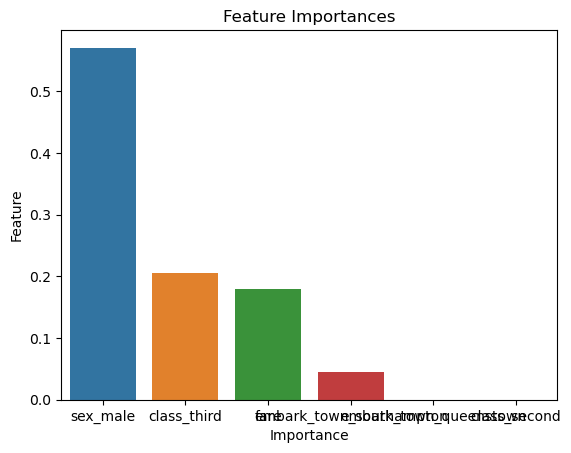

In [136]:
importances = clf.feature_importances_
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})


# sort df by feature importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
# plot
sns.barplot(y='Importance', x='Feature', data=feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [ ]:
run_model